# Análisis Exploratorio para Homologación de Carreras Universitarias

Este cuaderno forma parte del desarrollo del Reto 01 del Prácticum Data & IA 2025 de la UTPL.  
El objetivo es diseñar una solución de inteligencia de negocios que permita identificar carreras similares entre universidades ecuatorianas y la UTPL, incluso si los nombres no coinciden exactamente.

Este notebook se encargará inicialmente del **análisis exploratorio de datos (EDA)** del archivo `base-datos-abiertos_oferta-academica_05022025.xlsx`. A partir de este análisis se determinará la mejor estrategia de emparejamiento semántico y visualización.

En futuras fases, este notebook actuará como **orquestador principal** de una arquitectura basada en microservicios, ejecutando módulos externos (`.py`) para preprocesamiento, modelado y análisis semántico.

---
### 🗂 Estructura del notebook:

1. **Carga de librerías y configuración del entorno**
2. **Carga del archivo fuente**
3. **Exploración básica del dataset**
4. **Limpieza inicial de columnas irrelevantes y valores nulos**
5. **Análisis exploratorio por variables clave**
6. **Detección de columnas útiles para el matching semántico**
7. **Planificación de módulos externos**

In [2]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración visual y de entorno
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
%matplotlib inline

# Confirmación de entorno
print("Entorno EDA inicial cargado correctamente ✅")


Entorno EDA inicial cargado correctamente ✅


In [6]:
# Cargar el archivo Excel omitiendo las filas superiores informativas
df = pd.read_excel("base-datos-abiertos_oferta-academica_05022025.xlsx", skiprows=13)

# Confirmar lectura
print(f"✅ Dimensiones del archivo: {df.shape}")
df.head()


✅ Dimensiones del archivo: (20045, 10)


,NOMBRE_IES,TIPO_IES,TIPO_FINANCIAMIENTO,NOMBRE_CARRERA,CAMPO_AMPLIO,NIVEL_FORMACIÓN,MODALIDAD,PROVINCIA,CANTÓN,ESTADO
0,ESCUELA POLITECNICA NACIONAL,UNIVERSIDAD,PÚBLICA,INGENIERIA AGROINDUSTRIAL,AGRICULTURA,TERCER NIVEL O PREGRADO,PRESENCIAL,PICHINCHA,QUITO,NO VIGENTE HABILITADO PARA REGISTRO DE TÍTULOS
1,ESCUELA POLITECNICA NACIONAL,UNIVERSIDAD,PÚBLICA,INGENIERIA EN CIENCIAS ECONOMICAS Y FINANCIERAS,"CIENCIAS SOCIALES, EDUCACION COMERCIAL Y DERECHO",TERCER NIVEL O PREGRADO,PRESENCIAL,PICHINCHA,QUITO,NO VIGENTE HABILITADO PARA REGISTRO DE TÍTULOS
2,ESCUELA POLITECNICA NACIONAL,UNIVERSIDAD,PÚBLICA,INGENIERIA EN ELECTRONICA Y REDES DE INFORMACION,"INGENIERIA, INDUSTRIA Y CONSTRUCCION",TERCER NIVEL O PREGRADO,PRESENCIAL,PICHINCHA,QUITO,NO VIGENTE HABILITADO PARA REGISTRO DE TÍTULOS
3,ESCUELA POLITECNICA NACIONAL,UNIVERSIDAD,PÚBLICA,INGENIERIA EN SISTEMAS INFORMATICOS Y DE COMPU...,CIENCIAS,TERCER NIVEL O PREGRADO,PRESENCIAL,PICHINCHA,QUITO,NO VIGENTE HABILITADO PARA REGISTRO DE TÍTULOS
4,ESCUELA POLITECNICA NACIONAL,UNIVERSIDAD,PÚBLICA,INGENIERIA INFORMATICA,CIENCIAS,TERCER NIVEL O PREGRADO,PRESENCIAL,PICHINCHA,QUITO,NO VIGENTE HABILITADO PARA REGISTRO DE TÍTULOS


In [11]:
# Verificar nombres de columnas y tipos
print("🧾 Columnas disponibles:")
print(df.columns.tolist())

print("\n📌 Tipos de datos:")
print(df.dtypes)

# Verificar valores únicos por columna
print("\n🔎 Valores únicos por columna (resumen):")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} únicos")


🧾 Columnas disponibles:
['NOMBRE_IES', 'TIPO_IES', 'TIPO_FINANCIAMIENTO', 'NOMBRE_CARRERA', 'CAMPO_AMPLIO', 'NIVEL_FORMACIÓN', 'MODALIDAD', 'PROVINCIA', 'CANTÓN', 'ESTADO']

📌 Tipos de datos:
NOMBRE_IES             object
TIPO_IES               object
TIPO_FINANCIAMIENTO    object
NOMBRE_CARRERA         object
CAMPO_AMPLIO           object
NIVEL_FORMACIÓN        object
MODALIDAD              object
PROVINCIA              object
CANTÓN                 object
ESTADO                 object
dtype: object

🔎 Valores únicos por columna (resumen):
NOMBRE_IES: 292 únicos
TIPO_IES: 2 únicos
TIPO_FINANCIAMIENTO: 4 únicos
NOMBRE_CARRERA: 5715 únicos
CAMPO_AMPLIO: 23 únicos
NIVEL_FORMACIÓN: 7 únicos
MODALIDAD: 8 únicos
PROVINCIA: 24 únicos
CANTÓN: 179 únicos
ESTADO: 3 únicos


In [17]:
# Nombres de columnas
print("🔍 Columnas disponibles:")
print(df.columns.tolist())

# Tipos de datos
df.info()

# Valores nulos
print("\n📉 Porcentaje de nulos por columna:")
print(df.isnull().mean().round(3) * 100)


🔍 Columnas disponibles:
['NOMBRE_IES', 'TIPO_IES', 'TIPO_FINANCIAMIENTO', 'NOMBRE_CARRERA', 'CAMPO_AMPLIO', 'NIVEL_FORMACIÓN', 'MODALIDAD', 'PROVINCIA', 'CANTÓN', 'ESTADO']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20045 entries, 0 to 20044
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NOMBRE_IES           20044 non-null  object
 1   TIPO_IES             20044 non-null  object
 2   TIPO_FINANCIAMIENTO  20045 non-null  object
 3   NOMBRE_CARRERA       20045 non-null  object
 4   CAMPO_AMPLIO         20045 non-null  object
 5   NIVEL_FORMACIÓN      20045 non-null  object
 6   MODALIDAD            20045 non-null  object
 7   PROVINCIA            20045 non-null  object
 8   CANTÓN               20045 non-null  object
 9   ESTADO               20045 non-null  object
dtypes: object(10)
memory usage: 1.5+ MB

📉 Porcentaje de nulos por columna:
NOMBRE_IES             0.0
TIPO_IES               0.0

In [21]:
# Copia de respaldo por seguridad
df_raw = df.copy()

# Normalización de texto para consistencia
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

# Verificamos si hay duplicados exactos
print(f"\n📛 Duplicados exactos: {df.duplicated().sum()}")

df.info()



📛 Duplicados exactos: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20045 entries, 0 to 20044
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NOMBRE_IES           20044 non-null  object
 1   TIPO_IES             20044 non-null  object
 2   TIPO_FINANCIAMIENTO  20045 non-null  object
 3   NOMBRE_CARRERA       20045 non-null  object
 4   CAMPO_AMPLIO         20045 non-null  object
 5   NIVEL_FORMACIÓN      20045 non-null  object
 6   MODALIDAD            20045 non-null  object
 7   PROVINCIA            20045 non-null  object
 8   CANTÓN               20045 non-null  object
 9   ESTADO               20045 non-null  object
dtypes: object(10)
memory usage: 1.5+ MB


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6812\1200827485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ies.values, y=top_ies.index, palette="Blues_r")


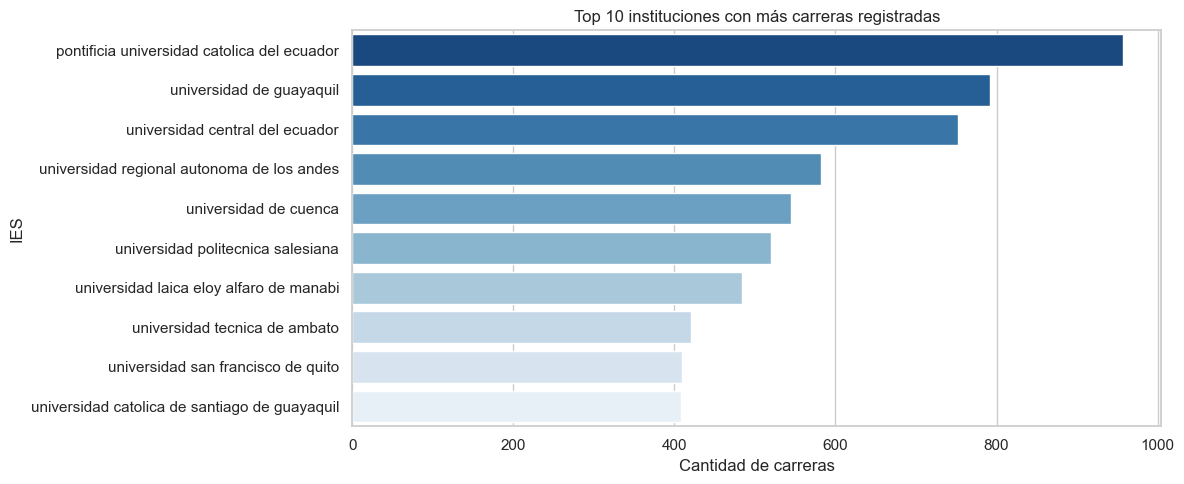

In [23]:
# Universidades con más carreras
top_ies = df['NOMBRE_IES'].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_ies.values, y=top_ies.index, palette="Blues_r")
plt.title("Top 10 instituciones con más carreras registradas")
plt.xlabel("Cantidad de carreras")
plt.ylabel("IES")
plt.tight_layout()
plt.show()
